# Google Stocks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_train = pd.read_csv('Google_Stock_Price_Train.csv')
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
Date      1258 non-null object
Open      1258 non-null float64
High      1258 non-null float64
Low       1258 non-null float64
Close     1258 non-null object
Volume    1258 non-null object
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


## Data Preprocessing

In [4]:
training_set = data_train.iloc[:,1:2].values

In [5]:
training_set.shape

(1258, 1)

In [6]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [7]:
training_set_scaled = scaler.fit_transform(training_set)

In [8]:
# Create a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

In [9]:
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])

In [10]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

## Building RNN

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [13]:
regressor = Sequential()
# First LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM Layer and Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# Output Layer
regressor.add(Dense(units=1))

In [14]:
# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [15]:
# Fitting the RNN to training set
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0352
Epoch 2/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0062
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0054A: 0s - lo
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0059
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0056
Epoch 6/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0049
Epoch 8/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0048
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0040
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0048
Epoch 11/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0040
Epoch 12/100
1198/1198 [==============================] - 4s 4ms

## Making Predictions and Visulalizing the Results

In [16]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
actual_stock_price = data_test.iloc[:,1:2].values

In [17]:
data_total = pd.concat((data_train['Open'],data_test['Open']),axis=0)

In [20]:
inputs = data_total[len(data_total)-len(data_test)-60:].values

In [21]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [22]:
inputs = inputs.reshape(-1,1)

In [23]:
inputs = scaler.transform(inputs)

In [24]:
inputs.shape

(80, 1)

In [25]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [26]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(20, 60, 1)

In [27]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

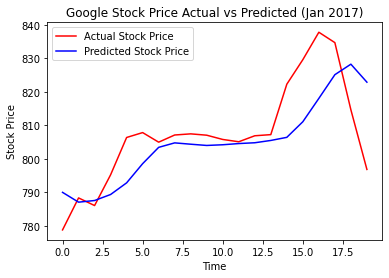

In [28]:
# Visualising the Results
plt.plot(actual_stock_price,color='red',label='Actual Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title("Google Stock Price Actual vs Predicted (Jan 2017)")
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()